In [1]:
import pandas as pd
import matplotlib
#matplotlib.style.use('ggplot')

In [2]:
fiscal = pd.read_csv("output/1_fiscal.csv")
fiscal = fiscal[fiscal["City"] != "GROTON (City of)"]
print len(fiscal["City"].unique())
fiscal.head()

169


,City,report_year,Education spending,Inter_Gov_Rev,Enrollment
0,ANDOVER,2013,8562868.0,2930349.0,588.63
1,ANSONIA,2013,34124712.0,29957368.0,2628.64
2,ASHFORD,2013,11250309.0,4953913.0,642.80
3,AVON,2013,53396764.0,8450231.0,3472.15
4,BARKHAMSTED,2013,8852107.0,2215545.0,648.78


In [3]:
fiscal.groupby("report_year").agg({"Enrollment":'sum'})

,Enrollment
report_year,
2007,562684.33
2008,558048.15
2009,552782.61
2010,548313.48
2011,544179.16
2012,538196.54
2013,533198.23
2014,528427.98
2015,523184.97


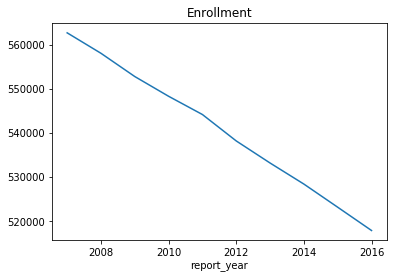

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plot = lambda x: fiscal.groupby("report_year").agg({x:'sum'}).plot(title=x,legend=None)
plot("Enrollment")
plt.gcf().savefig("figures/for-story/2.1 statewide-enrollment FISCIND.png")

# EDSIGHT ENROLLMENT 

In [5]:
combined = pd.read_csv("output/5_combined.csv")
combined.head()

,City,report_year,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank
0,ANDOVER,2002,30.3,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,108.0
1,ANDOVER,2003,62.2,NaN,23.6,NaN,True,NaN,NaN,NaN,NaN,108.0
2,ANDOVER,2004,62.2,NaN,23.8,NaN,True,NaN,NaN,NaN,NaN,108.0
3,ANDOVER,2005,60.6,NaN,25.8,NaN,True,NaN,NaN,NaN,NaN,108.0
4,ANDOVER,2006,59.6,NaN,24.8,NaN,True,NaN,NaN,NaN,NaN,108.0


In [6]:
combined.groupby(["report_year"]).agg({"EDSIGHT_ENROLLMENT":'sum'})

,EDSIGHT_ENROLLMENT
report_year,
2002,0.0
2003,0.0
2004,0.0
2005,0.0
2006,0.0
2007,0.0
2008,516261.0
2009,510929.0
2010,506693.0


<module 'matplotlib.pyplot' from '/Users/jakekara/pandas/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

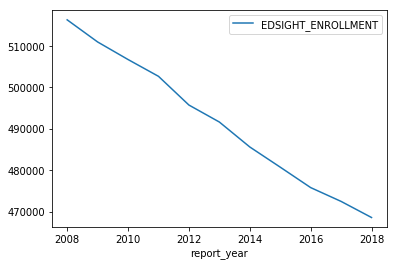

In [7]:
combined[combined["report_year"] > 2007].groupby(["report_year"]).agg({"EDSIGHT_ENROLLMENT":'sum'}).plot()
plt.gcf().savefig("figures/for-story/2.1 ALT statewide-enrollment EDSIGHT (subgroup).png")
plt

# Spending over time

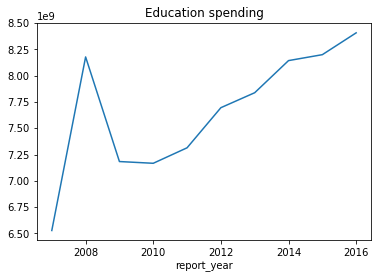

In [8]:
plot("Education spending")


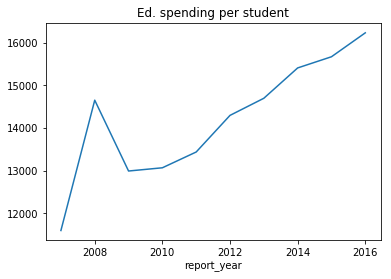

In [9]:
# Spending oper student over time
spending_totals = fiscal.groupby("report_year").agg({"Education spending":'sum'})
enrollment_totals = fiscal.groupby("report_year").agg({"Enrollment":'sum'})
totals = spending_totals.join(enrollment_totals)
totals["spending_per_student"] = totals["Education spending"] / totals["Enrollment"]
totals["spending_per_student"].plot(title="Ed. spending per student")